In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U torchinfo torchtune torchmetrics einops

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
!pip install albumentations==1.4.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.12
    Uninstalling albumentations-1.4.12:
      Successfully uninstalled albumentations-1.4.12


In [4]:
!pip install -U mamba-ssm causal-conv1d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.4 MB/s eta 0:00:00
  Created wheel for mamba-ssm: filename=mamba_ssm-2.2.2-cp310-cp310-linux_x86_64.whl size=323803485 sha256=cd8ee941b25398d90c135d3a180b5dc33e478c98ae4998b61749809beaff947a
  Stored in directory: /root/.cache/pip/wheels/57/7c/90/9f963468ecc3791e36e388f9e7b4a4e1e3f90fbb340055aa4d
  Created wheel for causal-conv1d: filename=causal_conv1d-1.4.0-cp310-cp310-linux_x86_64.whl size=104684541 sha256=7406be22f70ba3bb956556f0f0ce04608b5ad00fc171df39b562c97dc757731d
  Stored in directory: /root/.cache/pip/wheels/e3/dd/4c/205f24e151736bd22f5980738dd10a19af6f093b6f4dcab006
Successfully built mamba-ssm causal-conv1d


In [5]:
!pip install -U torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfully uninstalled nvidia-cudnn-cu12-8.9.2.26
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1+cu121
    Uninstalling torch-2.3.1+cu121:
      Successfully uninstalled torch-2.3.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.1+cu121 requires torch==2.3.1, but you have tor

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from albumentations.pytorch import ToTensorV2
import numpy as np
from tqdm import tqdm
from torch.utils.data.dataset import Dataset
from PIL import Image
import glob
import os
import torch.nn.functional as F
import albumentations as A
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from torchmetrics.classification import MulticlassJaccardIndex
import shutil
import cv2
import json
from einops.layers.torch import Rearrange, Reduce
from torch import Tensor
from einops import rearrange, repeat
from torchinfo import summary
from torchtune.modules import RMSNorm
from mamba_ssm import Mamba

/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/selective_scan_interface.py:164: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, xz, conv1d_weight, conv1d_bias, x_proj_weight, delta_proj_weight,
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/selective_scan_interface.py:240: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dout):
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/triton/layer_norm.py:986: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(
/usr/local/lib/python3.10/dist-packages/mamba_ssm/ops/triton/layer_norm.py:1045: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type=

In [7]:
!wget https://landcover.ai.linuxpolska.com/download/landcover.ai.v1.zip

--2024-08-07 17:05:19--  https://landcover.ai.linuxpolska.com/download/landcover.ai.v1.zip
Resolving landcover.ai.linuxpolska.com (landcover.ai.linuxpolska.com)... 195.78.67.65
Connecting to landcover.ai.linuxpolska.com (landcover.ai.linuxpolska.com)|195.78.67.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1538212277 (1.4G) [application/zip]
Saving to: ‘landcover.ai.v1.zip’

landcover.ai.v1.zip 100%[===================>]   1.43G  15.2MB/s    in 96s     

2024-08-07 17:06:56 (15.3 MB/s) - ‘landcover.ai.v1.zip’ saved [1538212277/1538212277]



In [8]:
!unzip landcover.ai.v1.zip -d landcover.ai.v1

Archive:  landcover.ai.v1.zip
   creating: landcover.ai.v1/images/
  inflating: landcover.ai.v1/images/M-33-48-A-c-4-4.tif  
  inflating: landcover.ai.v1/images/M-33-20-D-c-4-2.tif  
  inflating: landcover.ai.v1/images/M-33-20-D-d-3-3.tif  
  inflating: landcover.ai.v1/images/M-33-32-B-b-4-4.tif  
  inflating: landcover.ai.v1/images/M-33-7-A-d-2-3.tif  
  inflating: landcover.ai.v1/images/M-33-7-A-d-3-2.tif  
  inflating: landcover.ai.v1/images/M-34-32-B-a-4-3.tif  
  inflating: landcover.ai.v1/images/M-34-32-B-b-1-3.tif  
  inflating: landcover.ai.v1/images/M-34-5-D-d-4-2.tif  
  inflating: landcover.ai.v1/images/M-34-51-C-b-2-1.tif  
  inflating: landcover.ai.v1/images/M-34-51-C-d-4-1.tif  
  inflating: landcover.ai.v1/images/M-34-55-B-b-4-1.tif  
  inflating: landcover.ai.v1/images/M-34-56-A-b-1-4.tif  
  inflating: landcover.ai.v1/images/M-34-6-A-d-2-2.tif  
  inflating: landcover.ai.v1/images/M-34-65-D-a-4-4.tif  
  inflating: landcover.ai.v1/images/M-34-65-D-c-4-2.tif  
  inflati

In [9]:
IMGS_DIR = "./landcover.ai.v1/images"
MASKS_DIR = "./landcover.ai.v1/masks"
OUTPUT_DIR = "./landcover.ai.v1/output"

TARGET_SIZE = 512

img_paths = glob.glob(os.path.join(IMGS_DIR, "*.tif"))
mask_paths = glob.glob(os.path.join(MASKS_DIR, "*.tif"))

img_paths.sort()
mask_paths.sort()

os.makedirs(OUTPUT_DIR)
for i, (img_path, mask_path) in enumerate(zip(img_paths, mask_paths)):
    img_filename = os.path.splitext(os.path.basename(img_path))[0]
    mask_filename = os.path.splitext(os.path.basename(mask_path))[0]
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)

    assert img_filename == mask_filename and img.shape[:2] == mask.shape[:2]

    k = 0
    for y in range(0, img.shape[0], TARGET_SIZE):
        for x in range(0, img.shape[1], TARGET_SIZE):
            img_tile = img[y : y + TARGET_SIZE, x : x + TARGET_SIZE]
            mask_tile = mask[y : y + TARGET_SIZE, x : x + TARGET_SIZE]

            if img_tile.shape[0] == TARGET_SIZE and img_tile.shape[1] == TARGET_SIZE:
                out_img_path = os.path.join(
                    OUTPUT_DIR, "{}_{}.tif".format(img_filename, k)
                )
                cv2.imwrite(out_img_path, img_tile)

                out_mask_path = os.path.join(
                    OUTPUT_DIR, "{}_{}_m.tif".format(mask_filename, k)
                )
                cv2.imwrite(out_mask_path, mask_tile)

            k += 1

    print("Processed {} {}/{}".format(img_filename, i + 1, len(img_paths)))

Processed M-33-20-D-c-4-2 1/41
Processed M-33-20-D-d-3-3 2/41
Processed M-33-32-B-b-4-4 3/41
Processed M-33-48-A-c-4-4 4/41
Processed M-33-7-A-d-2-3 5/41
Processed M-33-7-A-d-3-2 6/41
Processed M-34-32-B-a-4-3 7/41
Processed M-34-32-B-b-1-3 8/41
Processed M-34-5-D-d-4-2 9/41
Processed M-34-51-C-b-2-1 10/41
Processed M-34-51-C-d-4-1 11/41
Processed M-34-55-B-b-4-1 12/41
Processed M-34-56-A-b-1-4 13/41
Processed M-34-6-A-d-2-2 14/41
Processed M-34-65-D-a-4-4 15/41
Processed M-34-65-D-c-4-2 16/41
Processed M-34-65-D-d-4-1 17/41
Processed M-34-68-B-a-1-3 18/41
Processed M-34-77-B-c-2-3 19/41
Processed N-33-104-A-c-1-1 20/41
Processed N-33-119-C-c-3-3 21/41
Processed N-33-130-A-d-3-3 22/41
Processed N-33-130-A-d-4-4 23/41
Processed N-33-139-C-d-2-2 24/41
Processed N-33-139-C-d-2-4 25/41
Processed N-33-139-D-c-1-3 26/41
Processed N-33-60-D-c-4-2 27/41
Processed N-33-60-D-d-1-2 28/41
Processed N-33-96-D-d-1-1 29/41
Processed N-34-106-A-b-3-4 30/41
Processed N-34-106-A-c-1-3 31/41
Processed N-

In [10]:
train_data_dir = "landcover.ai.v1/train/image"
train_label_dir = "landcover.ai.v1/train/label"

val_data_dir = "landcover.ai.v1/val/image"
val_label_dir = "landcover.ai.v1/val/label"

test_data_dir = "landcover.ai.v1/test/image"
test_label_dir = "landcover.ai.v1/test/label"

paths = [
    train_data_dir,
    train_label_dir,
    val_data_dir,
    val_label_dir,
    test_data_dir,
    test_label_dir,
]

for p in paths:
    if not os.path.exists(p):
        os.makedirs(p)
        print(f"Folder '{p}' created.")
    else:
        print(f"Folder '{p}' already exists.")


with open("landcover.ai.v1/train.txt") as f:
    train_split = f.read().splitlines()

with open("landcover.ai.v1/val.txt") as f:
    val_split = f.read().splitlines()

with open("landcover.ai.v1/test.txt") as f:
    test_split = f.read().splitlines()

print("Train, Val, Test splits count")
print(len(train_split), len(val_split), len(test_split))
print("Last item of each split")
print(train_split[-1], val_split[-1], test_split[-1])

for i in train_split:
    source_file_img = os.path.join("landcover.ai.v1/output", f"{i}.tif")
    source_file_label = os.path.join("landcover.ai.v1/output", f"{i}_m.tif")
    destination_file_img = os.path.join(train_data_dir, f"{i}.tif")
    destination_file_label = os.path.join(train_label_dir, f"{i}.tif")
    if os.path.isfile(source_file_img) and not os.path.exists(destination_file_img):
        shutil.copy2(source_file_img, destination_file_img)
    if os.path.isfile(source_file_label) and not os.path.exists(destination_file_label):
        shutil.copy2(source_file_label, destination_file_label)

for i in val_split:
    source_file_img = os.path.join("landcover.ai.v1/output", f"{i}.tif")
    source_file_label = os.path.join("landcover.ai.v1/output", f"{i}_m.tif")
    destination_file_img = os.path.join(val_data_dir, f"{i}.tif")
    destination_file_label = os.path.join(val_label_dir, f"{i}.tif")
    if os.path.isfile(source_file_img) and not os.path.exists(destination_file_img):
        shutil.copy2(source_file_img, destination_file_img)
    if os.path.isfile(source_file_label) and not os.path.exists(destination_file_label):
        shutil.copy2(source_file_label, destination_file_label)

for i in test_split:
    source_file_img = os.path.join("landcover.ai.v1/output", f"{i}.tif")
    source_file_label = os.path.join("landcover.ai.v1/output", f"{i}_m.tif")
    destination_file_img = os.path.join(test_data_dir, f"{i}.tif")
    destination_file_label = os.path.join(test_label_dir, f"{i}.tif")
    if os.path.isfile(source_file_img) and not os.path.exists(destination_file_img):
        shutil.copy2(source_file_img, destination_file_img)
    if os.path.isfile(source_file_label) and not os.path.exists(destination_file_label):
        shutil.copy2(source_file_label, destination_file_label)

print("File copying completed.")

Folder 'landcover.ai.v1/train/image' created.
Folder 'landcover.ai.v1/train/label' created.
Folder 'landcover.ai.v1/val/image' created.
Folder 'landcover.ai.v1/val/label' created.
Folder 'landcover.ai.v1/test/image' created.
Folder 'landcover.ai.v1/test/label' created.
Train, Val, Test splits count
7470 1602 1602
Last item of each split
N-34-97-D-c-2-4_9 N-34-97-D-c-2-4_75 N-34-97-D-c-2-4_77
File copying completed.


In [11]:
torch.cuda.is_available()

True

In [12]:
class PatchEmbedding(nn.Module):
    def __init__(self):
        super().__init__()
        self.projection = nn.Sequential(
            nn.Conv2d(3, 1024, kernel_size=16, stride=16),
            Rearrange('b e (h) (w) -> b (h w) e'),
        )
        self.positions = nn.Parameter(torch.zeros(1, (512 // 16) ** 2, 1024))
        nn.init.trunc_normal_(self.positions, std=0.02)

    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        x += self.positions
        return x

class TransformerBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.norm1 = RMSNorm(1024)
        self.attn = nn.MultiheadAttention(1024, 16, batch_first=True, dropout=0.0)
        self.norm2 = RMSNorm(1024)
        self.mlp = nn.Sequential(
            nn.Linear(1024, 1024 * 2),
            nn.SiLU(),
            nn.Dropout(0.0),
            nn.Linear(1024 * 2, 1024)
        )
        self.dropout = nn.Dropout(0.0)

    def forward(self, x):
        x = x + self.dropout(self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0])
        x = x + self.dropout(self.mlp(self.norm2(x)))
        return x

class MambaBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.norm1 = RMSNorm(1024)
        self.mamba = Mamba(d_model=1024)
        self.norm2 = RMSNorm(1024)
        self.mlp = nn.Sequential(
            nn.Linear(1024, 1024 * 2),
            nn.SiLU(),
            nn.Dropout(0.0),
            nn.Linear(1024 * 2, 1024)
        )
        self.dropout = nn.Dropout(0.0)

    def forward(self, x):
        x = x + self.dropout(self.mamba(self.norm1(x)))
        x = x + self.dropout(self.mlp(self.norm2(x)))
        return x

class SETRM(nn.Module):
    def __init__(self, num_transformer_layers, mamba_to_transformer_ratio):
        super().__init__()

        self.patch_embed = PatchEmbedding()

        self.num_transformer_layers = num_transformer_layers
        self.mamba_to_transformer_ratio = mamba_to_transformer_ratio

        self.transformer_layers = nn.ModuleList()
        self.mamba_layers = nn.ModuleList()

        self.final_transformer = TransformerBlock()

        for i in range(num_transformer_layers):
            self.transformer_layers.append(TransformerBlock())

        for i in range(num_transformer_layers * mamba_to_transformer_ratio):
            self.mamba_layers.append(MambaBlock())

        self.decoder_1 = nn.Sequential(
            nn.Conv2d(1024, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.SiLU(),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        )

        self.decoder_2 = nn.Sequential(
            nn.Conv2d(512, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.SiLU(),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        )

        self.decoder_3 = nn.Sequential(
            nn.Conv2d(256, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.SiLU(),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        )

        self.decoder_4 = nn.Sequential(
            nn.Conv2d(128, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.SiLU(),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        )

        self.final_out = nn.Conv2d(64, 5, 3, padding=1)

    def forward(self, x):
        x = self.patch_embed(x)

        for i in range(len(self.transformer_layers)):
            x = self.transformer_layers[i](x)
            if len(self.mamba_layers) > 0:
                for j in range(i * self.mamba_to_transformer_ratio, (i * self.mamba_to_transformer_ratio) + self.mamba_to_transformer_ratio):
                    x = self.mamba_layers[j](x)

        x = self.final_transformer(x)

        x = rearrange(x, "b (h w) c -> b c h w", h = 512 // 16)

        x = self.decoder_1(x)
        x = self.decoder_2(x)
        x = self.decoder_3(x)
        x = self.decoder_4(x)

        x = self.final_out(x)

        return x

In [13]:
def preprocess_data(image, mask, train):
    if train:
        image_transforms = A.Compose(
            [
                A.OneOf([
                    A.ToGray(),
                    A.HueSaturationValue(hue_shift_limit=3, sat_shift_limit=3, val_shift_limit=3),
                    A.RandomBrightnessContrast(brightness_limit=0.01, contrast_limit=0.01, brightness_by_max=False)
                ], p=0.2),
                A.Normalize(),
                ToTensorV2()
            ]
        )
    else:
        image_transforms = A.Compose(
            [
                A.Normalize(),
                ToTensorV2()
            ]
        )

    image = image_transforms(image=image)
    image = image['image']

    mask = torch.from_numpy(mask)
    mask = torch.permute(mask, (2, 0, 1))
    mask = mask[0]

    return image, mask

In [14]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, target_paths, preprocess_fn, train=False):
        self.image_paths = image_paths
        self.target_paths = target_paths
        self.preprocess_fn = preprocess_fn
        self.train = train

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        mask = Image.open(self.target_paths[index])

        return self.preprocess_fn(np.array(image), np.array(mask, dtype=np.int8), train=self.train)

    def __len__(self):
        return len(self.image_paths)

In [15]:
class DiceLoss(nn.Module):
    """Dice Loss PyTorch
        Created by: Zhang Shuai
        Email: shuaizzz666@gmail.com
        dice_loss = 1 - 2*p*t / (p^2 + t^2). p and t represent predict and target.
    Args:
        weight: An array of shape [C,]
        predict: A float32 tensor of shape [N, C, *], for Semantic segmentation task is [N, C, H, W]
        target: A int64 tensor of shape [N, *], for Semantic segmentation task is [N, H, W]
    Return:
        diceloss
    """
    def __init__(self, weight=None):
        super(DiceLoss, self).__init__()
        if weight is not None:
            weight = torch.Tensor(weight)
            self.weight = weight / torch.sum(weight) # Normalized weight
        self.smooth = 1e-5

    def forward(self, predict, target):
        N, C = predict.size()[:2]
        predict = predict.view(N, C, -1) # (N, C, *)
        target = target.view(N, 1, -1) # (N, 1, *)

        predict = F.softmax(predict, dim=1) # (N, C, *) ==> (N, C, *)
        ## convert target(N, 1, *) into one hot vector (N, C, *)
        target_onehot = torch.zeros(predict.size()).cuda()  # (N, 1, *) ==> (N, C, *)
        target_onehot.scatter_(1, target, 1)  # (N, C, *)

        intersection = torch.sum(predict * target_onehot, dim=2)  # (N, C)
        union = torch.sum(predict.pow(2), dim=2) + torch.sum(target_onehot, dim=2)  # (N, C)
        ## p^2 + t^2 >= 2*p*t, target_onehot^2 == target_onehot
        dice_coef = (2 * intersection + self.smooth) / (union + self.smooth)  # (N, C)

        if hasattr(self, 'weight'):
            if self.weight.type() != predict.type():
                self.weight = self.weight.type_as(predict)
                dice_coef = dice_coef * self.weight * C  # (N, C)
        dice_loss = 1 - torch.mean(dice_coef)  # 1

        return dice_loss

In [16]:
class CEPlusDiceLoss(nn.Module):
    def __init__(self):
        super(CEPlusDiceLoss, self).__init__()
        self.dice_loss = DiceLoss()
        self.ce_loss = nn.CrossEntropyLoss()

    def forward(self, predict, target):
        dice = self.dice_loss(predict, target.to(torch.int64))
        ce = self.ce_loss(predict, target.long())

        total = dice + ce

        return total

In [17]:
batch_size = 1
num_classes = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
test_img_paths = glob.glob(os.path.join("landcover.ai.v1/test/image", "*.tif"))
test_img_paths = sorted(test_img_paths)

test_mask_paths = glob.glob(os.path.join("landcover.ai.v1/test/label", "*.tif"))
test_mask_paths = sorted(test_mask_paths)

In [19]:
test_dataset = CustomDataset(
    image_paths=test_img_paths,
    target_paths=test_mask_paths,
    preprocess_fn=preprocess_data,
)

test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

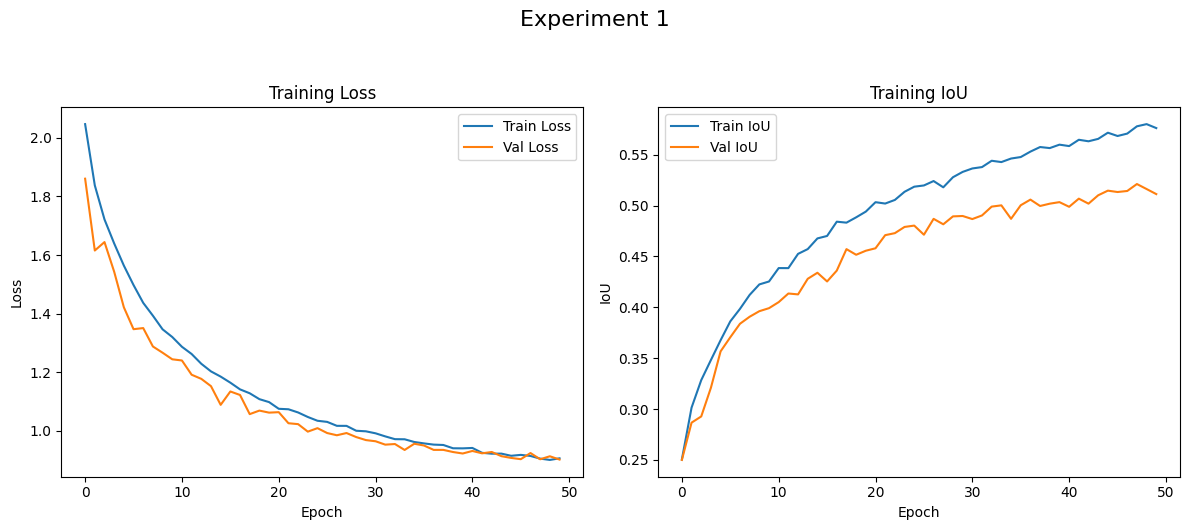

In [21]:
df1 = pd.read_json('/content/drive/MyDrive/train-stats-12t-0m-run-1.json')
df2 = pd.read_json('/content/drive/MyDrive/train-stats-12t-0m-run-2.json')
model_1_train_df = pd.concat([df1, df2], ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Experiment 1', fontsize=16, y=1.05)

ax1.plot(model_1_train_df.index, model_1_train_df['train_loss'], label='Train Loss')
ax1.plot(model_1_train_df.index, model_1_train_df['val_loss'], label='Val Loss')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(model_1_train_df.index, model_1_train_df['train_iou'], label='Train IoU')
ax2.plot(model_1_train_df.index, model_1_train_df['val_iou'], label='Val IoU')
ax2.set_title('Training IoU')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('IoU')
ax2.legend()

plt.tight_layout()
plt.show()

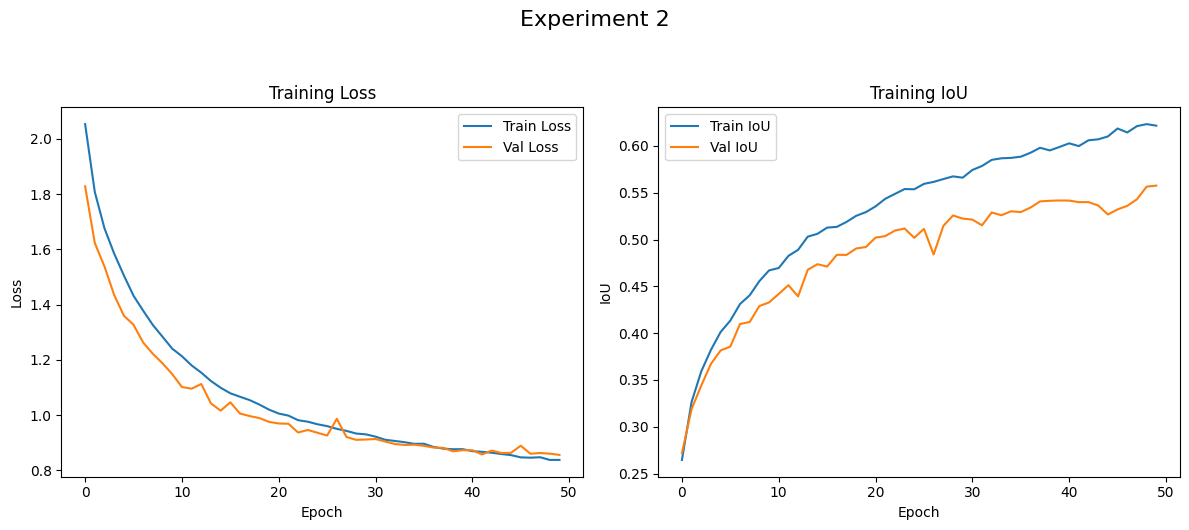

In [22]:
df1 = pd.read_json('/content/drive/MyDrive/train-stats-6t-1m-run-1.json')
df2 = pd.read_json('/content/drive/MyDrive/train-stats-6t-1m-run-2.json')
model_2_train_df = pd.concat([df1, df2], ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Experiment 2', fontsize=16, y=1.05)

ax1.plot(model_2_train_df.index, model_2_train_df['train_loss'], label='Train Loss')
ax1.plot(model_2_train_df.index, model_2_train_df['val_loss'], label='Val Loss')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(model_2_train_df.index, model_2_train_df['train_iou'], label='Train IoU')
ax2.plot(model_2_train_df.index, model_2_train_df['val_iou'], label='Val IoU')
ax2.set_title('Training IoU')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('IoU')
ax2.legend()

plt.tight_layout()
plt.show()

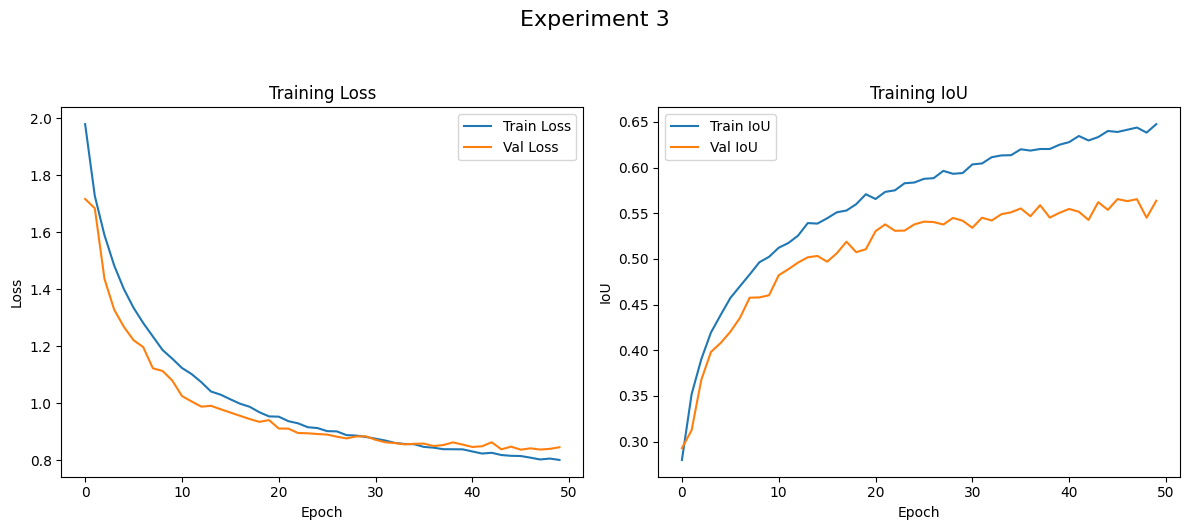

In [23]:
df1 = pd.read_json('/content/drive/MyDrive/train-stats-2t-5m-run-1.json')
df2 = pd.read_json('/content/drive/MyDrive/train-stats-2t-5m-run-2.json')
model_3_train_df = pd.concat([df1, df2], ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Experiment 3', fontsize=16, y=1.05)

ax1.plot(model_3_train_df.index, model_3_train_df['train_loss'], label='Train Loss')
ax1.plot(model_3_train_df.index, model_3_train_df['val_loss'], label='Val Loss')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(model_3_train_df.index, model_3_train_df['train_iou'], label='Train IoU')
ax2.plot(model_3_train_df.index, model_3_train_df['val_iou'], label='Val IoU')
ax2.set_title('Training IoU')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('IoU')
ax2.legend()

plt.tight_layout()
plt.show()

In [24]:
from torchmetrics.classification import MulticlassF1Score
from torchmetrics.classification import MulticlassRecall
from torchmetrics.classification import MulticlassPrecision
from torchmetrics.classification import MulticlassAccuracy

In [25]:
model_1 = SETRM(num_transformer_layers=12, mamba_to_transformer_ratio=0).to(device)
model_2 = SETRM(num_transformer_layers=6, mamba_to_transformer_ratio=1).to(device)
model_3 = SETRM(num_transformer_layers=2, mamba_to_transformer_ratio=5).to(device)

model_1.load_state_dict(torch.load(f"/content/drive/MyDrive/landcover_seg_model-12t-0m-run-2.pth"))
model_2.load_state_dict(torch.load(f"/content/drive/MyDrive/landcover_seg_model-6t-1m-run-2.pth"))
model_3.load_state_dict(torch.load(f"/content/drive/MyDrive/landcover_seg_model-2t-5m-run-2.pth"))

loss_fn = CEPlusDiceLoss()
overall_iou_score = MulticlassJaccardIndex(num_classes=num_classes).to(device)
class_iou_score = MulticlassJaccardIndex(num_classes=num_classes, average=None).to(device)
overall_f1_score = MulticlassF1Score(num_classes=num_classes).to(device)
class_f1_score = MulticlassF1Score(num_classes=num_classes, average=None).to(device)
overall_recall = MulticlassRecall(num_classes=num_classes).to(device)
class_recall = MulticlassRecall(num_classes=num_classes, average=None).to(device)
overall_precision = MulticlassPrecision(num_classes=num_classes).to(device)
class_precision = MulticlassPrecision(num_classes=num_classes, average=None).to(device)
overall_accuracy = MulticlassAccuracy(num_classes=num_classes).to(device)
class_accuracy = MulticlassAccuracy(num_classes=num_classes, average=None).to(device)

<ipython-input-25-3799860d477e>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(f"/content/drive/MyDrive/landcover_seg_model-12t-0m-run-2

In [26]:
model_1.eval()
model_2.eval()
model_3.eval()

model_iou = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "Overall": [],
    "Experiment": []
}
model_f1 = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "Overall": [],
    "Experiment": []
}
model_r = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "Overall": [],
    "Experiment": []
}
model_p = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "Overall": [],
    "Experiment": []
}
model_a = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "Overall": [],
    "Experiment": []
}

with torch.inference_mode():
    for images, masks in tqdm(test_loader, desc="Test"):
        images, masks = images.to(device), masks.to(device)

        output = model_1(images)

        o_iou = overall_iou_score(output, masks)
        c_iou = class_iou_score(output, masks)
        o_f1 = overall_f1_score(output, masks)
        c_f1 = class_f1_score(output, masks)
        o_r = overall_recall(output, masks)
        c_r = class_recall(output, masks)
        o_p = overall_precision(output, masks)
        c_p = class_precision(output, masks)
        o_a = overall_accuracy(output, masks)
        c_a = class_accuracy(output, masks)

        model_iou["0"].append(c_iou[0].item())
        model_iou["1"].append(c_iou[1].item())
        model_iou["2"].append(c_iou[2].item())
        model_iou["3"].append(c_iou[3].item())
        model_iou["4"].append(c_iou[4].item())
        model_iou["Overall"].append(o_iou.item())
        model_iou["Experiment"].append("Experiment 1")

        model_f1["0"].append(c_f1[0].item())
        model_f1["1"].append(c_f1[1].item())
        model_f1["2"].append(c_f1[2].item())
        model_f1["3"].append(c_f1[3].item())
        model_f1["4"].append(c_f1[4].item())
        model_f1["Overall"].append(o_f1.item())
        model_f1["Experiment"].append("Experiment 1")

        model_r["0"].append(c_r[0].item())
        model_r["1"].append(c_r[1].item())
        model_r["2"].append(c_r[2].item())
        model_r["3"].append(c_r[3].item())
        model_r["4"].append(c_r[4].item())
        model_r["Overall"].append(o_r.item())
        model_r["Experiment"].append("Experiment 1")

        model_p["0"].append(c_p[0].item())
        model_p["1"].append(c_p[1].item())
        model_p["2"].append(c_p[2].item())
        model_p["3"].append(c_p[3].item())
        model_p["4"].append(c_p[4].item())
        model_p["Overall"].append(o_p.item())
        model_p["Experiment"].append("Experiment 1")

        model_a["0"].append(c_a[0].item())
        model_a["1"].append(c_a[1].item())
        model_a["2"].append(c_a[2].item())
        model_a["3"].append(c_a[3].item())
        model_a["4"].append(c_a[4].item())
        model_a["Overall"].append(o_a.item())
        model_a["Experiment"].append("Experiment 1")

        output = model_2(images)

        o_iou = overall_iou_score(output, masks)
        c_iou = class_iou_score(output, masks)
        o_f1 = overall_f1_score(output, masks)
        c_f1 = class_f1_score(output, masks)
        o_r = overall_recall(output, masks)
        c_r = class_recall(output, masks)
        o_p = overall_precision(output, masks)
        c_p = class_precision(output, masks)
        o_a = overall_accuracy(output, masks)
        c_a = class_accuracy(output, masks)

        model_iou["0"].append(c_iou[0].item())
        model_iou["1"].append(c_iou[1].item())
        model_iou["2"].append(c_iou[2].item())
        model_iou["3"].append(c_iou[3].item())
        model_iou["4"].append(c_iou[4].item())
        model_iou["Overall"].append(o_iou.item())
        model_iou["Experiment"].append("Experiment 2")

        model_f1["0"].append(c_f1[0].item())
        model_f1["1"].append(c_f1[1].item())
        model_f1["2"].append(c_f1[2].item())
        model_f1["3"].append(c_f1[3].item())
        model_f1["4"].append(c_f1[4].item())
        model_f1["Overall"].append(o_f1.item())
        model_f1["Experiment"].append("Experiment 2")

        model_r["0"].append(c_r[0].item())
        model_r["1"].append(c_r[1].item())
        model_r["2"].append(c_r[2].item())
        model_r["3"].append(c_r[3].item())
        model_r["4"].append(c_r[4].item())
        model_r["Overall"].append(o_r.item())
        model_r["Experiment"].append("Experiment 2")

        model_p["0"].append(c_p[0].item())
        model_p["1"].append(c_p[1].item())
        model_p["2"].append(c_p[2].item())
        model_p["3"].append(c_p[3].item())
        model_p["4"].append(c_p[4].item())
        model_p["Overall"].append(o_p.item())
        model_p["Experiment"].append("Experiment 2")

        model_a["0"].append(c_a[0].item())
        model_a["1"].append(c_a[1].item())
        model_a["2"].append(c_a[2].item())
        model_a["3"].append(c_a[3].item())
        model_a["4"].append(c_a[4].item())
        model_a["Overall"].append(o_a.item())
        model_a["Experiment"].append("Experiment 2")

        output = model_3(images)

        o_iou = overall_iou_score(output, masks)
        c_iou = class_iou_score(output, masks)
        o_f1 = overall_f1_score(output, masks)
        c_f1 = class_f1_score(output, masks)
        o_r = overall_recall(output, masks)
        c_r = class_recall(output, masks)
        o_p = overall_precision(output, masks)
        c_p = class_precision(output, masks)
        o_a = overall_accuracy(output, masks)
        c_a = class_accuracy(output, masks)

        model_iou["0"].append(c_iou[0].item())
        model_iou["1"].append(c_iou[1].item())
        model_iou["2"].append(c_iou[2].item())
        model_iou["3"].append(c_iou[3].item())
        model_iou["4"].append(c_iou[4].item())
        model_iou["Overall"].append(o_iou.item())
        model_iou["Experiment"].append("Experiment 3")

        model_f1["0"].append(c_f1[0].item())
        model_f1["1"].append(c_f1[1].item())
        model_f1["2"].append(c_f1[2].item())
        model_f1["3"].append(c_f1[3].item())
        model_f1["4"].append(c_f1[4].item())
        model_f1["Overall"].append(o_f1.item())
        model_f1["Experiment"].append("Experiment 3")

        model_r["0"].append(c_r[0].item())
        model_r["1"].append(c_r[1].item())
        model_r["2"].append(c_r[2].item())
        model_r["3"].append(c_r[3].item())
        model_r["4"].append(c_r[4].item())
        model_r["Overall"].append(o_r.item())
        model_r["Experiment"].append("Experiment 3")

        model_p["0"].append(c_p[0].item())
        model_p["1"].append(c_p[1].item())
        model_p["2"].append(c_p[2].item())
        model_p["3"].append(c_p[3].item())
        model_p["4"].append(c_p[4].item())
        model_p["Overall"].append(o_p.item())
        model_p["Experiment"].append("Experiment 3")

        model_a["0"].append(c_a[0].item())
        model_a["1"].append(c_a[1].item())
        model_a["2"].append(c_a[2].item())
        model_a["3"].append(c_a[3].item())
        model_a["4"].append(c_a[4].item())
        model_a["Overall"].append(o_a.item())
        model_a["Experiment"].append("Experiment 3")

Test: 100%|██████████| 1602/1602 [10:12<00:00,  2.62it/s]


In [27]:
model_iou_df = pd.DataFrame(model_iou)
model_iou_df["Metric"] = "IoU"
model_f1_df = pd.DataFrame(model_f1)
model_f1_df["Metric"] = "F1"
model_r_df = pd.DataFrame(model_r)
model_r_df["Metric"] = "Recall"
model_p_df = pd.DataFrame(model_p)
model_p_df["Metric"] = "Precision"
model_a_df = pd.DataFrame(model_a)
model_a_df["Metric"] = "Accuracy"

all_df = pd.concat([model_iou_df, model_f1_df, model_r_df, model_p_df, model_a_df], ignore_index=True)

In [28]:
grouped = all_df.groupby(['Metric', 'Experiment']).mean()
grouped = grouped.round(2)
grouped

0     1     2     3     4  Overall
Metric    Experiment                                         
Accuracy  Experiment 1  0.72  0.08  0.57  0.11  0.12     0.61
          Experiment 2  0.74  0.09  0.59  0.12  0.16     0.62
          Experiment 3  0.73  0.09  0.61  0.13  0.17     0.63
F1        Experiment 1  0.72  0.08  0.55  0.12  0.13     0.61
          Experiment 2  0.75  0.09  0.58  0.13  0.16     0.62
          Experiment 3  0.74  0.09  0.58  0.13  0.17     0.63
IoU       Experiment 1  0.67  0.06  0.49  0.10  0.09     0.55
          Experiment 2  0.69  0.07  0.52  0.11  0.12     0.56
          Experiment 3  0.69  0.07  0.53  0.12  0.12     0.57
Precision Experiment 1  0.77  0.10  0.57  0.13  0.18     0.66
          Experiment 2  0.78  0.10  0.59  0.15  0.19     0.66
          Experiment 3  0.79  0.10  0.59  0.15  0.21     0.67
Recall    Experiment 1  0.72  0.08  0.57  0.11  0.12     0.61
          Experiment 2  0.74  0.09  0.59  0.12  0.16     0.62
          Experiment 3  0.73  0.09  0.61  0.13  0.17     0.63

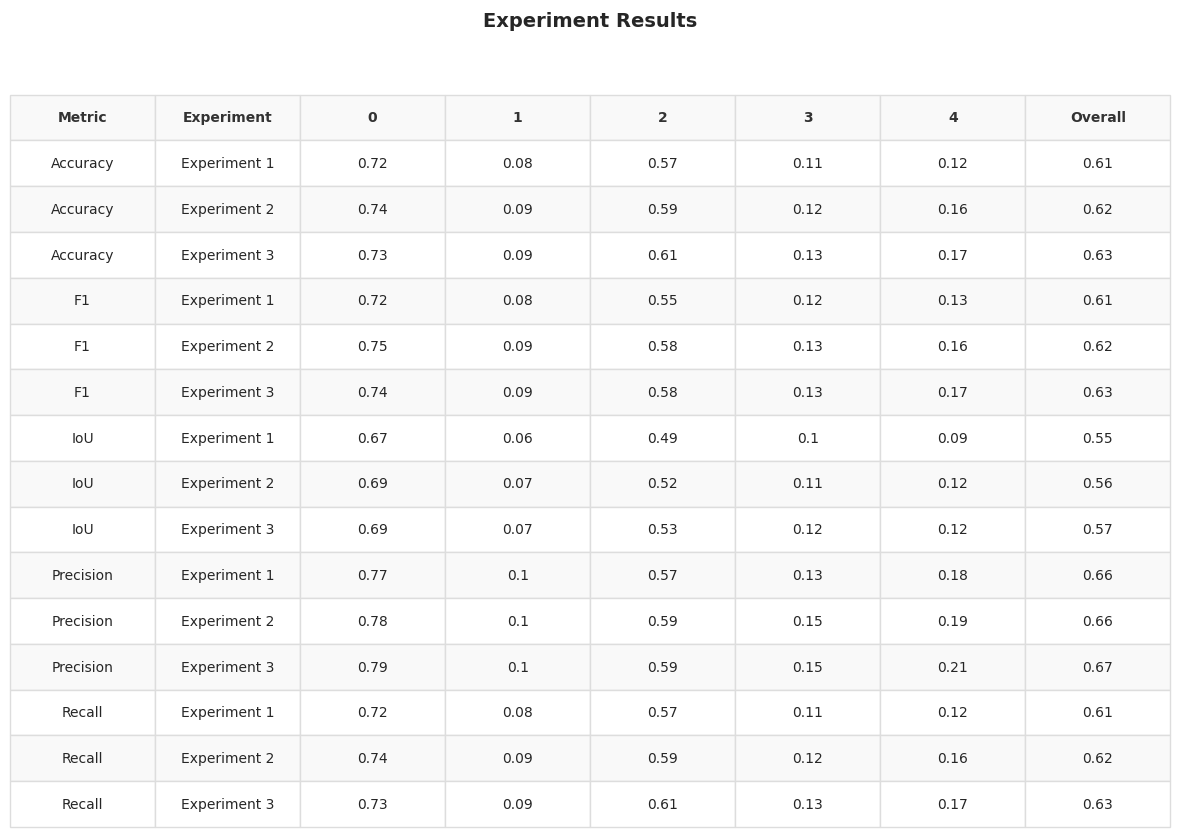

In [29]:
from matplotlib import gridspec

df = grouped
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20])

sns.set(font_scale=1.1)

ax_title = fig.add_subplot(gs[0])
ax_table = fig.add_subplot(gs[1])

ax_title.axis('off')
ax_table.axis('off')

ax_title.text(0.5, 0.5, 'Experiment Results',
              fontsize=14, fontweight='bold', ha='center', va='center')

index_names = df.index.names
table_data = [df.index.get_level_values(name) for name in index_names] + [df[col] for col in df.columns]
table_data = list(map(list, zip(*table_data)))

table = ax_table.table(cellText=table_data,
                       colLabels=list(index_names) + list(df.columns),
                       cellLoc='center',
                       loc='center',
                       colColours=['#f0f0f0'] * (len(df.columns) + len(index_names)),
                       cellColours=[['#f9f9f9'] * (len(df.columns) + len(index_names))] * len(df))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='#333333')
    # if col < len(index_names) and row != 0:
    #     cell.set_text_props(weight='bold')
    cell.set_edgecolor('#dddddd')
    cell.set_facecolor('#f9f9f9' if row % 2 == 0 else '#ffffff')
    cell.set_height(0.1)

plt.tight_layout()

plt.show()

In [30]:
import time

model_1.eval()
model_2.eval()
model_3.eval()

model_1_times = []
model_2_times = []
model_3_times = []

for i in range(5):
    total_time = 0
    with torch.inference_mode():
        for images, masks in tqdm(test_loader, desc="Test"):
            images, masks = images.to(device), masks.to(device)

            start_time = time.perf_counter()
            _ = model_1(images)
            torch.cuda.synchronize()
            end_time = time.perf_counter()

            total_time += (end_time - start_time)

    throughput = len(test_loader) / total_time
    print(f"Throughput: {throughput:.2f} images/second")
    model_1_times.append(throughput)

for i in range(5):
    total_time = 0
    with torch.inference_mode():
        for images, masks in tqdm(test_loader, desc="Test"):
            images, masks = images.to(device), masks.to(device)

            start_time = time.perf_counter()
            _ = model_2(images)
            torch.cuda.synchronize()
            end_time = time.perf_counter()

            total_time += (end_time - start_time)

    throughput = len(test_loader) / total_time
    print(f"Throughput: {throughput:.2f} images/second")
    model_2_times.append(throughput)

for i in range(5):
    total_time = 0
    with torch.inference_mode():
        for images, masks in tqdm(test_loader, desc="Test"):
            images, masks = images.to(device), masks.to(device)

            start_time = time.perf_counter()
            _ = model_3(images)
            torch.cuda.synchronize()
            end_time = time.perf_counter()

            total_time += (end_time - start_time)

    throughput = len(test_loader) / total_time
    print(f"Throughput: {throughput:.2f} images/second")
    model_3_times.append(throughput)

Test: 100%|██████████| 1602/1602 [03:36<00:00,  7.40it/s]


Throughput: 8.98 images/second


Test: 100%|██████████| 1602/1602 [03:35<00:00,  7.43it/s]


Throughput: 8.98 images/second


Test: 100%|██████████| 1602/1602 [03:35<00:00,  7.43it/s]


Throughput: 8.97 images/second


Test: 100%|██████████| 1602/1602 [03:35<00:00,  7.42it/s]


Throughput: 8.97 images/second


Test: 100%|██████████| 1602/1602 [03:35<00:00,  7.43it/s]


Throughput: 8.98 images/second


Test: 100%|██████████| 1602/1602 [03:25<00:00,  7.81it/s]


Throughput: 9.52 images/second


Test: 100%|██████████| 1602/1602 [03:25<00:00,  7.79it/s]


Throughput: 9.53 images/second


Test: 100%|██████████| 1602/1602 [03:24<00:00,  7.82it/s]


Throughput: 9.53 images/second


Test: 100%|██████████| 1602/1602 [03:25<00:00,  7.81it/s]


Throughput: 9.53 images/second


Test: 100%|██████████| 1602/1602 [03:25<00:00,  7.78it/s]


Throughput: 9.54 images/second


Test: 100%|██████████| 1602/1602 [03:18<00:00,  8.05it/s]


Throughput: 9.91 images/second


Test: 100%|██████████| 1602/1602 [03:18<00:00,  8.06it/s]


Throughput: 9.91 images/second


Test: 100%|██████████| 1602/1602 [03:18<00:00,  8.05it/s]


Throughput: 9.91 images/second


Test: 100%|██████████| 1602/1602 [03:18<00:00,  8.06it/s]


Throughput: 9.91 images/second


Test: 100%|██████████| 1602/1602 [03:18<00:00,  8.06it/s]

Throughput: 9.91 images/second


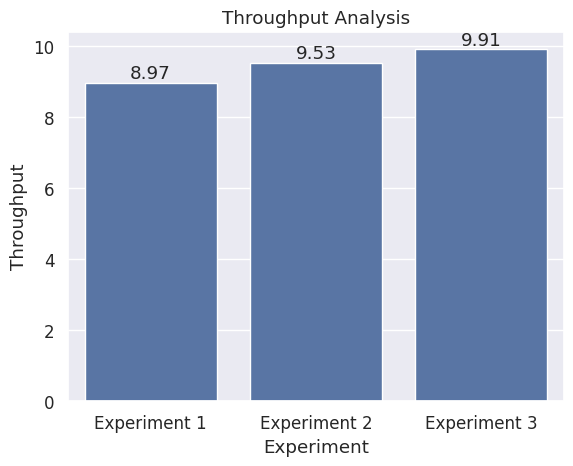

In [32]:
from statistics import mean

data = pd.DataFrame({
    'Experiment': ['Experiment 1', 'Experiment 2', 'Experiment 3'],
    'Throughput': [round(mean(model_1_times), 2), round(mean(model_2_times), 2), round(mean(model_3_times), 2)]
})

ax = sns.barplot(x='Experiment', y='Throughput', data=data)

for i, v in enumerate(data['Throughput']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Experiment')
plt.ylabel('Throughput')
plt.title('Throughput Analysis')

plt.show()